# Experiments on ASAF-1 :

In [74]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

plt.style.use("seaborn")


In [75]:
def PreprocessReward(rewards):
    return [max(0, r) for r in rewards]


def GetEWMA_Reward(rewards, ewmaLambda=0.1):
    ewmaRewards = [0.]
    for r in rewards:
        ewmaRewards.append(r * ewmaLambda + ewmaRewards[-1] * (1 - ewmaLambda))
    
    return ewmaRewards[:-1]

def GetSmoothReward(rewards, n=10):
    smoothRewards, nowRewards = [], deque()
    for i, reward in enumerate(rewards):
        if len(nowRewards) < n:
            nowRewards.appendleft(reward)
            smoothRewards.append(reward)
            continue
        
        smoothRewards.append(sum(nowRewards) / len(nowRewards))
        nowRewards.pop()
        nowRewards.appendleft(reward)
    
    return smoothRewards


def Plot(histories, expertDatas, title="", legendLoc=4, figsize=(10, 7), rewardType='EWMA_Reward', plotLength=None):
    plt.figure(figsize=figsize)
    for history in histories:
        plt.plot(
            history['Transition'][:plotLength], 
            history[ rewardType ][:plotLength], 
            color=history["LineColor"], linestyle='-', label=history["PlotLegend"])

    for expertData in expertDatas:
        plt.hlines(
            expertData["Reward"], 
            history['Transition'][:plotLength][0 ], 
            history['Transition'][:plotLength][-1], 
            color=expertData["LineColor"], linestyle='--'
        )

    plt.title(title)
    plt.legend(loc=legendLoc)
    plt.xlabel("Environment Steps")
    plt.ylabel("Reward")


def PreprocessExperiment(
    hitoryFolder    ,
    historyNames    ,
    lineColors      ,
    plotLegends     ,
    expertRewards   ,
    expertLineColors,
    ewmaLambda      ,
    smoothNumber    ,
    isNoZeroReward
):
    histories = []
    for i, historyName in enumerate(historyNames):
        with open(os.path.join(hitoryFolder, historyName), 'rb') as f:
            history = pickle.load(f)
        
        history["Name"        ] = historyName
        history["Reward"      ] = PreprocessReward(history["Reward"]) if isNoZeroReward else history["Reward"]
        history["EWMA_Reward" ] = GetEWMA_Reward  (history["Reward"], ewmaLambda)
        history["SmoothReward"] = GetSmoothReward (history["Reward"], smoothNumber)
        history["LineColor"   ] = lineColors[i]
        history["PlotLegend"  ] = plotLegends[i]
        histories.append(history)

    expertDatas = []
    for i, reward in enumerate(expertRewards):
        expertDatas.append({
            "Reward"   : reward,
            "LineColor": expertLineColors[i]
        })
    
    return histories, expertDatas


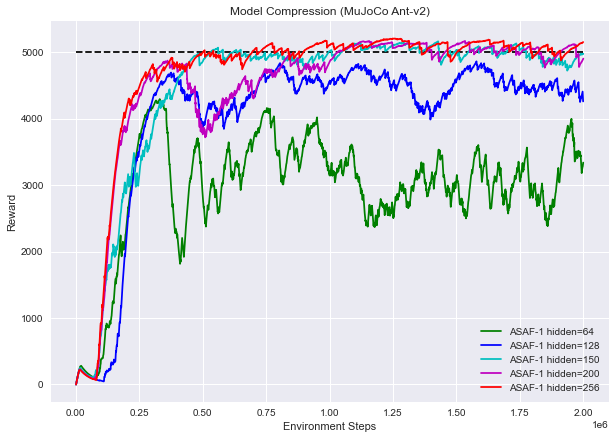

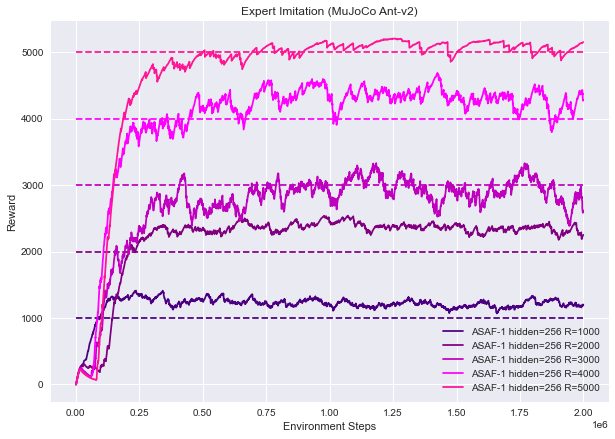

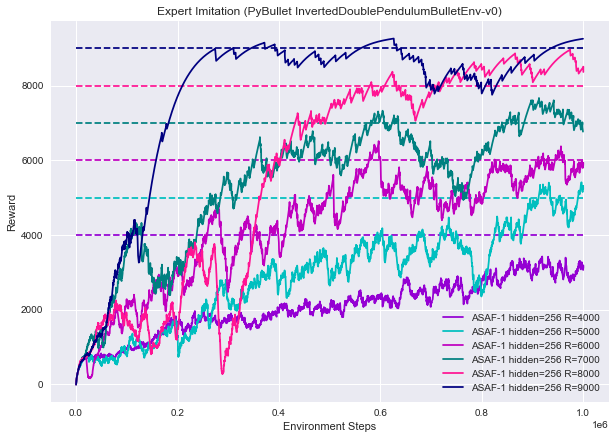

In [76]:
experiments = [
    {
        "Name": "Model Compression (MuJoCo Ant-v2)",
        "Data": dict(
                    hitoryFolder     = "../history",
                    historyNames     = ["ASAF1_64_Ant-v2.pkl", "ASAF1_128_Ant-v2.pkl", "ASAF1_150_Ant-v2.pkl", "ASAF1_200_Ant-v2.pkl", "ASAF1_256_Ant-v2.pkl"],
                    lineColors       = ['g', 'b', 'c', 'm', 'r'],
                    plotLegends      = ['ASAF-1 hidden=64', 'ASAF-1 hidden=128', 'ASAF-1 hidden=150', 'ASAF-1 hidden=200', 'ASAF-1 hidden=256'],
                    expertRewards    = [5000],
                    expertLineColors = ['k'],
                    ewmaLambda       = 0.02,
                    smoothNumber     = 20,
                    isNoZeroReward   = True
                ),
        "Plot": dict(
                    rewardType = 'EWMA_Reward'
                )
    },
    {
        "Name": "Expert Imitation (MuJoCo Ant-v2)",
        "Data": dict(
                    hitoryFolder     = "../history",
                    historyNames     = ["ASAF1_256_Ant-v2_R=1000.pkl", "ASAF1_256_Ant-v2_R=2000.pkl", "ASAF1_256_Ant-v2_R=3000.pkl", "ASAF1_256_Ant-v2_R=4000.pkl", "ASAF1_256_Ant-v2_R=5000.pkl"],
                    lineColors       = ['indigo', 'purple', 'm', 'magenta', 'deeppink'],
                    plotLegends      = ['ASAF-1 hidden=256 R=1000', 'ASAF-1 hidden=256 R=2000', 'ASAF-1 hidden=256 R=3000', 'ASAF-1 hidden=256 R=4000', 'ASAF-1 hidden=256 R=5000'],
                    expertRewards    = [1000, 2000, 3000, 4000, 5000],
                    expertLineColors = ['indigo', 'purple', 'm', 'magenta', 'deeppink'],
                    ewmaLambda       = 0.02,
                    smoothNumber     = 20,
                    isNoZeroReward   = True
                ),
        "Plot": dict(
                    rewardType = 'EWMA_Reward'
                )
    },
    {
        "Name": "Expert Imitation (PyBullet InvertedDoublePendulumBulletEnv-v0)",
        "Data": dict(
                    hitoryFolder     = "../history",
                    historyNames     = ["ASAF1_256_InvertedDoublePendulumBulletEnv-v0_R=4000.pkl", "ASAF1_256_InvertedDoublePendulumBulletEnv-v0_R=5000.pkl", "ASAF1_256_InvertedDoublePendulumBulletEnv-v0_R=6000.pkl", "ASAF1_256_InvertedDoublePendulumBulletEnv-v0_R=7000.pkl", "ASAF1_256_InvertedDoublePendulumBulletEnv-v0_R=8000.pkl", "ASAF1_256_InvertedDoublePendulumBulletEnv-v0_R=9000.pkl"],
                    lineColors       = ['darkviolet', 'c', 'm', 'teal', 'deeppink', 'navy'],
                    plotLegends      = ['ASAF-1 hidden=256 R=4000', 'ASAF-1 hidden=256 R=5000', 'ASAF-1 hidden=256 R=6000', 'ASAF-1 hidden=256 R=7000', 'ASAF-1 hidden=256 R=8000', 'ASAF-1 hidden=256 R=9000'],
                    expertRewards    = [4000, 5000, 6000, 7000, 8000, 9000],
                    expertLineColors = ['darkviolet', 'c', 'm', 'teal', 'deeppink', 'navy'],
                    ewmaLambda       = 0.02,
                    smoothNumber     = 20,
                    isNoZeroReward   = True
                ),
        "Plot": dict(
                    rewardType = 'EWMA_Reward'
                )
    }
]

for experiment in experiments:
    histories, expertDatas = PreprocessExperiment(**experiment["Data"])
    Plot(histories, expertDatas, experiment["Name"], **experiment["Plot"])


# A toy problem to verify the idea of structure discriminator in ASAF :

In [4]:
import time
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

from utils import GetTrainIteration, RandomTrainIteration

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn.utils import clip_grad_norm_
from torch.distributions.normal import Normal


plt.style.use("seaborn")


class GaussianData:
    def __init__(self, mu, sigma, device="cpu"):
        self.mu     = mu
        self.sigma  = sigma
        self.device = device
    
    def Sample(self, n):
        x = np.random.multivariate_normal(self.mu, self.sigma, size=n)
        return torch.from_numpy(x).to(self.device).float()


class Generator(nn.Module):
    def __init__(self, inDim, outDim, device="cpu"):
        super().__init__()
        self.inDim  = inDim
        self.outDim = outDim
        self.device = device

        self.fc0   = nn.Linear(inDim, 16)
        self.fc1   = nn.Linear(16, 32)
        self.mu    = nn.Linear(32, outDim)
        self.sigma = nn.Linear(32, outDim)

        self.to(device)
        self.Initialize()
    
    def forward(self, x):
        h = F.relu(self.fc0(x))
        h = F.relu(self.fc1(h))
        return self.mu(h), self.sigma(h).exp()
    
    def Initialize(self):
        self.mu.bias.data.add_(4)
        self.sigma.bias.data.mul_(2)
    
    def Sample(self, n, isNumpy=False):
        noise = torch.randn(n, self.inDim, device=self.device)
        mu, sigma = self(noise)
        
        normal  = Normal(mu, sigma)
        output  = normal.sample()
        logProb = normal.log_prob(output)
        logProb = logProb.sum(dim=-1)
        if isNumpy:
            return output.cpu().data.numpy(), logProb.cpu().data.numpy()
        else:
            return output, logProb
    
    def GetLogProb(self, x):
        noise = torch.randn(x.size(0), self.inDim, device=self.device)
        mu, sigma = self(noise)
        
        normal  = Normal(mu, sigma)
        logProb = normal.log_prob(x)
        logProb = logProb.sum(dim=-1)
        return logProb
    
    def GetMuSigma(self):
        noise = torch.randn(1, self.inDim, device=self.device)
        mu, sigma = self(noise)
        mu, sigma = mu[0].cpu().data.numpy(), sigma[0].cpu().data.numpy()
        return mu, np.diag(sigma)
    

def GaussianKL_Div(mu0, sigma0, mu1, sigma1):
    dim, sigma1_Inverse, muSub = mu0.shape[0], np.linalg.inv(sigma1), mu0 - mu1
    a = np.log(np.linalg.det(sigma1) / np.linalg.det(sigma0)) - dim
    b = np.trace(sigma1_Inverse @ sigma0)
    c = muSub.T @ sigma1_Inverse @ muSub
    return 0.5 * (a + b + c)


def Train(nRealData=1000000, nFakeData=10000, batchSize=512, epochs=100, lr=2e-3, mu=[-10, 0.1], sigma=[0.5, 7], eps=1e-10):
    device     = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    dataLoader = GaussianData(mu, (sigma := np.diag(sigma)), device)
    generator  = Generator(4, 2, device)
    optimizer  = optim.Adam(generator.parameters(), lr)

    batchLenght = nFakeData // batchSize + int(nFakeData % batchSize != 0)
    fakeDataList = []
    realData = dataLoader.Sample(nRealData)
    for epoch in range(epochs):
        realLogProbOld = generator.GetLogProb(realData)
        fakeData, fakeLogProbOld = generator.Sample(nFakeData)
        realLogProbOld, fakeLogProbOld = realLogProbOld.detach(), fakeLogProbOld.detach()
        for (sF, eF), (sR, eR) in zip(GetTrainIteration(nFakeData, batchSize), RandomTrainIteration(nRealData, batchSize, batchLenght)):
            fakeLogProb = generator.GetLogProb(fakeData[sF: eF])
            realLogProb = generator.GetLogProb(realData[sR: eR])

            fLPO, rLPO = fakeLogProbOld[sF: eF], realLogProbOld[sR: eR]
            fakeLoss = -(fLPO        - torch.log(fakeLogProb.exp() + fLPO.exp() + eps)).mean()
            realLoss = -(realLogProb - torch.log(realLogProb.exp() + rLPO.exp() + eps)).mean()

            loss = fakeLoss + realLoss
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        fakeDataList.append(fakeData.cpu().numpy())
        kl = GaussianKL_Div(*generator.GetMuSigma(), mu, sigma)
        print(f"\r| Epoch: {epoch + 1} | KL: {kl :.5f} |", end="")
    
    return generator, realData.cpu().numpy(), np.array(fakeDataList)


def PlotScatter(realData, fakeData, axis=[-20, 20, -20, 20], title=""):
    plt.axis(axis)
    plt.plot(realData[:, 0], realData[:, 1], 'r*', markersize=4, label="Real Data")
    plt.plot(fakeData[:, 0], fakeData[:, 1], 'bo', markersize=2, label="Fake Data")
    plt.title(title)
    plt.legend()
    plt.show()


def Animation(realData, fakeDataList, t=0.5, fignum=0, axis=[-20, 20, -20, 20]):
    plt.figure(fignum, figsize=(8, 8))
    for i, fakeData in enumerate(fakeDataList, 1):
        plt.gcf().set_size_inches(8, 8)
        PlotScatter(realData, fakeData, axis)
        time.sleep(t)
        if i < len(fakeDataList):
            plt.cla()
            clear_output(wait=True)


In [2]:
generator, realData, fakeDataList = Train()

| Epoch: 100 | KL: 0.23642 |

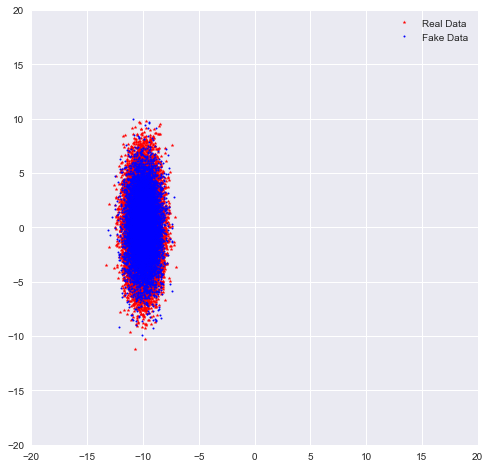

In [5]:
Animation(realData[:30000], fakeDataList[::4])